In [482]:
# Basic imports 
import pandas as pd 
import numpy as np 

# Plots imports 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  


# Feature Selection & Engneering imports
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Split imports 
from sklearn.model_selection import train_test_split

# Machine Learning models imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Cost functions imports
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Pipeline and Grid Search imports
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Save Models
import joblib

# Some notebook configrations imports 
import warnings;   warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import plotly.io as pio
pio.renderers.default = "notebook_connected"
%matplotlib inline
import ast


In [483]:
# Load the dataset
df = pd.read_csv('Dataframes/en_ML_df.csv')

df

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
0,51,Truck Center,2018-01-01 09:13:36.437000,2018-01-01 09:29:00,Volvo,head,2002,red,2455,1255,3710,POS,15,9,1,1,Monday,"['Decoration', 'Fender', 'Other', 'Taillight']","['front left', 'left', 'rear left']",['New'],Sweden,Luxury,Multi,95.617530,unacceptable,4,Acceptable,Morning,Low
1,54,Truck Center,2018-01-01 08:37:46.137000,2018-01-01 08:51:00,Volvo,head,2008,red,6510,5310,11820,POS,13,8,1,1,Monday,"['Bumper', 'Decoration', 'Other', 'Taillight']","['front right', 'right']",['New'],Sweden,Luxury,Multi,22.598870,Acceptable,4,Acceptable,Morning,Acceptable
2,94,Orouba,2018-01-01 10:17:57.727000,2018-01-01 10:25:00,BMW,Sedan,2012,white,5778,4778,10556,Insurance Company,7,10,1,1,Monday,['Bumper'],['rear'],['New'],Germany,Luxury,Car,20.929259,Acceptable,1,Fast,Morning,Acceptable
3,99,Orouba,2018-01-01 10:25:36.453000,2018-01-01 10:52:00,Hyundai,Genesis,2011,silver,1043,343,1386,POS,26,10,1,1,Monday,['Sensor'],['undefined'],['New'],Korea,Luxury,Multi,204.081633,unacceptable,1,Delay,Morning,Low
4,103,New Industrial,2018-01-01 10:42:32.120000,2018-01-01 10:56:00,Lexus,IS,2007,brouwn,1609,409,2019,Insurance Company,13,10,1,1,Monday,"['Bumper', 'Sensor']","['front', 'front right']",['New'],Japan,Luxury,Car,293.398533,unacceptable,2,Acceptable,Morning,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251468,253390,New Industrial,2018-12-18 14:25:26.810000,2018-12-18 15:57:00,Isuzu,Two,2016,white,2540,1040,3580,Insurance Company,91,14,12,18,Tuesday,"['Other', 'Rims']",['rear right'],['New'],Japan,Normal,Multi,144.230769,unacceptable,2,Delay,Afternoon,Acceptable
251469,253391,Capital Industrial,2018-12-19 15:39:27.750000,2018-12-19 16:00:00,Hyundai,Elantra,2016,white,6655,5355,12011,Insurance Company,20,15,12,19,Wednesday,"['Bumper', 'Decoration', 'Fender', 'Headlight'...","['front', 'front right', 'right', 'undefined']",['New'],Korea,Normal,Multi,24.276377,Acceptable,5,Acceptable,Afternoon,High
251470,253392,Remmal Industrial,2018-12-19 17:22:22.537000,2018-12-19 17:36:00,Chevrolet,Malibu,2011,silver,2600,600,3200,Insurance Company,13,17,12,19,Wednesday,['Dash insulator'],"['front left', 'rear left']",['New'],US,Normal,Multi,333.333333,unacceptable,1,Acceptable,Evening,Acceptable
251471,253393,New Industrial,2018-12-19 15:41:18.967000,2018-12-19 15:56:00,Hyundai,Elantra,2016,white,1673,273,1947,POS,14,15,12,19,Wednesday,"['Mudguard', 'Splash shield']",['rear left'],['New'],Korea,Normal,Multi,512.820513,unacceptable,2,Acceptable,Afternoon,Low


In [484]:
# To convert string to list 
df['PartsList'] = df['PartsList'].apply(lambda x : ast.literal_eval(x))
df['PositionList'] = df['PositionList'].apply(lambda x : ast.literal_eval(x))
df['PartStateList'] = df['PartStateList'].apply(lambda x : ast.literal_eval(x))



In [485]:
df.loc[1,'PartsList']

['Bumper', 'Decoration', 'Other', 'Taillight']

In [486]:
df.head()

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
0,51,Truck Center,2018-01-01 09:13:36.437000,2018-01-01 09:29:00,Volvo,head,2002,red,2455,1255,3710,POS,15,9,1,1,Monday,"[Decoration, Fender, Other, Taillight]","[front left, left, rear left]",[New],Sweden,Luxury,Multi,95.617530,unacceptable,4,Acceptable,Morning,Low
1,54,Truck Center,2018-01-01 08:37:46.137000,2018-01-01 08:51:00,Volvo,head,2008,red,6510,5310,11820,POS,13,8,1,1,Monday,"[Bumper, Decoration, Other, Taillight]","[front right, right]",[New],Sweden,Luxury,Multi,22.598870,Acceptable,4,Acceptable,Morning,Acceptable
2,94,Orouba,2018-01-01 10:17:57.727000,2018-01-01 10:25:00,BMW,Sedan,2012,white,5778,4778,10556,Insurance Company,7,10,1,1,Monday,[Bumper],[rear],[New],Germany,Luxury,Car,20.929259,Acceptable,1,Fast,Morning,Acceptable
3,99,Orouba,2018-01-01 10:25:36.453000,2018-01-01 10:52:00,Hyundai,Genesis,2011,silver,1043,343,1386,POS,26,10,1,1,Monday,[Sensor],[undefined],[New],Korea,Luxury,Multi,204.081633,unacceptable,1,Delay,Morning,Low
4,103,New Industrial,2018-01-01 10:42:32.120000,2018-01-01 10:56:00,Lexus,IS,2007,brouwn,1609,409,2019,Insurance Company,13,10,1,1,Monday,"[Bumper, Sensor]","[front, front right]",[New],Japan,Luxury,Car,293.398533,unacceptable,2,Acceptable,Morning,Low


***
<a id='ML_Reg'></a>
# ML Regression Section 
***

### Helper function to calculate the cost function for models and the base line

In [581]:
# This function to calculate the model cost and get the baseline of regressoin models 
# It's take the actual label and predicted label the calculate the cost functions and if the user pass only the actual label and make the baseline parameter Ture then 
# the function will take the mean of the label and apply the cost function
def calc_cost_regrs(y_true, y_predict=None, baseline=False):

    # Check if user make the base line true if yes then i will make the y_predict as mean of the actual label 
    if baseline:
        y_predict = [y_true.mean() for x in range(len(y_true))]
    
    # To Save all results of cost fucnitons here 
    result_dict = {}
    
    # Cost Functions 
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    r2=r2_score(y_true, y_predict)
    
    ls = [mse, mae, rmse, r2]
    ls2 = ["MSE", "MAE", "RMSE", "R2"]
    
    # Add the cost functions on the decleared variable 
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Function just to print the model accuracy 
def getAccuracy(X_test, y_test, model, X_train=None,y_train=None, title='of the model'):
    try:
            train_score = model.score(X_train, y_train)*100
            test_score = model.score(X_test, y_test)*100
            print(f'| Training Accuracy | Testing Accuracy |\n|     {round(train_score,2)}         |    {round(test_score,2)}         |')

            # Subtract the train score and test score then round it to 2 decimal
            diff  = round(train_score-test_score,2)

            # Print the differance
            print(f'The differance betewen the train accuracy and test accuracy is: {diff}%')

            # If the differance greater thean 25% maybe there is an overfiting and if greater thean 10 this is good model and if greater than 0 or equal then this great model else will be an underfitting
            if diff >=20:
                print('So maybe there is an (Overfiting)')
            elif diff>10:
                print('The model in general is (Good)')
            elif diff>=0:
                print('The model is (Great)')
            else:
                print('So maybe there is an (Underfiting)')
    except:
        print(f'The Accuracy {title} is : ({model.score(X_test, y_test)*100})\n')



# Functions to get the differance between two paased dictonries of cost functions and if normlaize is ture then will print the differance in percentage
def cost_diff_reg(res1, res2, normalize=False):
    diff_res={}
    for k, v in res1.items():
        diff_res[k] = (res1[k] - res2[k])
        if normalize:
            diff_res[k] = round((diff_res[k]/res1[k])*100, 3)  

    # If the erros with negitave sign then the error is increesing  by the precentage else is decreesing 
    print(f'The Erros is decreesing by:')
    for k, v in diff_res.items():
        if not normalize:
            print(f"{k}: {v}")
        else:
            print(f"{k}: {v} %")

In [596]:
# Take copy from original dataframe to apply the regression model
reg_df = df.copy()

In [597]:
# Get dummies for parts regression dataframe 
reg_df = reg_df.join(reg_df['PartsList'].str.join('|').str.get_dummies().add_prefix('part_'))
reg_df = reg_df.join(reg_df['PositionList'].str.join('|').str.get_dummies().add_prefix('pos_'))
reg_df = reg_df.join(reg_df['PartStateList'].str.join('|').str.get_dummies().add_prefix('state_'))



In [598]:
reg_df.head(1)

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,51,Truck Center,2018-01-01 09:13:36.437000,2018-01-01 09:29:00,Volvo,head,2002,red,2455,1255,3710,POS,15,9,1,1,Monday,"[Decoration, Fender, Other, Taillight]","[front left, left, rear left]",[New],Sweden,Luxury,Multi,95.61753,unacceptable,4,Acceptable,Morning,Low,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [599]:
# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']
unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')
unwanted_cols.append('TotalCostEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
unwanted_cols.append('CarClass')
# unwanted_cols.append('PartsNumber')



target = 'TotalCost'

In [600]:
reg_df.drop(unwanted_cols, axis=1, inplace=True)

In [601]:
reg_df.head(1)

,Area,CarBrand,CarModel,ManufactureYear,TotalCost,PaymentType,CarMade,CarType,PartsNumber,PartOfDay,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,Truck Center,Volvo,head,2002,3710,POS,Sweden,Multi,4,Morning,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [602]:
cat_cols = reg_df.describe(exclude='number').columns
num_cols = reg_df.describe().columns

reg_df[cat_cols]=reg_df[cat_cols].apply(LabelEncoder().fit_transform)
reg_df

,Area,CarBrand,CarModel,ManufactureYear,TotalCost,PaymentType,CarMade,CarType,PartsNumber,PartOfDay,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,4,96,815,2002,3710,1,13,1,4,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,4,96,815,2008,11820,1,13,1,4,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,2,5,655,2012,10556,0,5,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,37,362,2011,1386,1,9,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,50,412,2007,2019,0,8,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251468,1,40,740,2016,3580,0,8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
251469,0,37,278,2016,12011,0,9,1,5,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0
251470,3,12,505,2011,3200,0,16,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
251471,1,37,278,2016,1947,1,9,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Split Data

In [603]:
X_train, X_test, y_train, y_test = train_test_split(reg_df.drop(target, axis=1), reg_df[target],  train_size=0.8, random_state=42)

## Baseline Model
I made the baseline here because i want it after the scaleling to met with result

In [604]:
print(f'>>>>>>>>>>>>>>>>>>>>>>>Baseline<<<<<<<<<<<<<<<<<<<<<<<<<<')
reg_baseline = calc_cost_regrs(reg_df[target],baseline=True)

>>>>>>>>>>>>>>>>>>>>>>>Baseline<<<<<<<<<<<<<<<<<<<<<<<<<<
MSE: 72145653.64093144
MAE: 5063.779629443855
RMSE: 8493.859761082205
R2: 0.0


### **1st Regression Model (Random Forest Regressor)**

In [497]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train.values.ravel())
RFR.score(X_test, y_test)

0.6936799071968166

### **2nd Regression Model (XG Boost Regressor)**

In [498]:
XGB_R = XGBRegressor()
XGB_R.fit(X_train, y_train.values.ravel())
XGB_R.score(X_test, y_test)

0.7207329614407397

### **3rd Regression Model (Linear Regression)**

In [499]:
LR_r= LinearRegression()
LR_r.fit(X_train, y_train.values.ravel())
LR_r.score(X_test, y_test)

0.3908893076737273

## Model Evaluation


### **1st Model Evaluation (Random Forest Regressor)**

In [605]:
# Evaluation on the testing set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_test, y_test, RFR)
RFR_test_res = calc_cost_regrs(y_test,RFR.predict(X_test))

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (69.36799071968166)

MSE: 23493719.79986144
MAE: 2277.1755973901963
RMSE: 4847.032060948373
R2: 0.6936799071968166


In [575]:
# Evaluation on the training set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_train, y_train, RFR)
RFR_train_res =calc_cost_regrs(y_train,RFR.predict(X_train))

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (95.2632305228333)

MSE: 3363433.756984185
MAE: 882.4896794214737
RMSE: 1833.9666728117459
R2: 0.952632305228333


In [583]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy( X_test, y_test,RFR, X_train, y_train)
cost_diff_reg(RFR_train_res, RFR_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<
| Training Accuracy | Testing Accuracy |
|     95.26         |    69.37         |
The differance betewen the train accuracy and test accuracy is: 25.9%
So maybe there is an (Overfiting)
The Erros is decreesing by:
MSE: -598.504 %
MAE: -158.04 %
RMSE: -164.292 %
R2: 27.183 %


Because the error is increesing by 160% in 'MAE' between the train and test sets then there is an overfiting

In [503]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<')
cost_diff_reg(reg_baseline, RFR_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<
The Erros is decreesing by:
MSE: 67.436 %
MAE: 55.03 %
RMSE: 42.935 %
R2: -inf %


### **2nd Model  Evaluation (XG Boost Regressor)**

In [606]:
# Evaluation on the testing set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_test, y_test, XGB_R)
XGB_R_test_res = calc_cost_regrs(y_test,XGB_R.predict(X_test))

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (72.07329614407398)

MSE: 21418841.621545028
MAE: 2173.7823838419486
RMSE: 4628.049440265848
R2: 0.7207329614407397


In [607]:
# Evaluation on the training set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_train, y_train, XGB_R)
XGB_R_train_res =calc_cost_regrs(y_train,XGB_R.predict(X_train))

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (82.95644110161521)

MSE: 12102104.950284492
MAE: 2004.306944297153
RMSE: 3478.8079783576
R2: 0.8295644110161521


In [608]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy( X_test, y_test,XGB_R, X_train, y_train)
cost_diff_reg(XGB_R_train_res, XGB_R_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<
| Training Accuracy | Testing Accuracy |
|     82.96         |    72.07         |
The differance betewen the train accuracy and test accuracy is: 10.88%
The model in general is (Good)
The Erros is decreesing by:
MSE: -76.984 %
MAE: -8.456 %
RMSE: -33.035 %
R2: 13.119 %


Because the error is increesing by 103% in 'MAE' between the train and test sets then there is an overfiting

In [507]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<')
cost_diff_reg(reg_baseline, XGB_R_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<
The Erros is decreesing by:
MSE: 70.312 %
MAE: 57.072 %
RMSE: 45.513 %
R2: -inf %


### **3rd Model Evaluation (Linear Regression)**

In [508]:
# Evaluation on the testing set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_test, y_test, LR_r)
LR_r_test_res = calc_cost_regrs(y_test,LR_r.predict(X_test))

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (39.08893076737273)

MSE: 46716739.34823365
MAE: 3310.6791243847397
RMSE: 6834.964473077651
R2: 0.3908893076737273


In [509]:
# Evaluation on the training set 
print(f'>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_train, y_train, LR_r)
LR_r_train_res =calc_cost_regrs(y_train,LR_r.predict(X_train))

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (40.5105729310931)

MSE: 42241605.413082786
MAE: 3292.222498295429
RMSE: 6499.3542304665
R2: 0.40510572931093103


In [585]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy( X_test, y_test,LR_r, X_train, y_train)
cost_diff_reg(LR_r_train_res, LR_r_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Train & Test Results<<<<<<<<<<<<<<<<<<<<<<<<<<
| Training Accuracy | Testing Accuracy |
|     40.51         |    39.09         |
The differance betewen the train accuracy and test accuracy is: 1.42%
The model is (Great)
The Erros is decreesing by:
MSE: -10.594 %
MAE: -0.561 %
RMSE: -5.164 %
R2: 3.509 %


Because the error is increesing by 3% in 'MAE' between the train and test sets then it is a good model 

In [511]:
# The final model evaluation
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<')
cost_diff_reg(reg_baseline, LR_r_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance Between Baseline & Test Result<<<<<<<<<<<<<<<<<<<<<<<<<<
The Erros is decreesing by:
MSE: 35.247 %
MAE: 34.62 %
RMSE: 19.531 %
R2: -inf %


## Invetgiate the model

In [512]:
RFR_imp = XGB_R.feature_importances_

In [513]:
px.bar(
    x = X_train.columns,
    y = RFR_imp
)

## Model Optimization - Hyperparameter Tuning 

In [587]:
# Make copy from the original df to prefrome the hyperparametr tuning
rg_h_df = df.copy()

# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']
unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')
unwanted_cols.append('TotalCostEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
unwanted_cols.append('CarClass')



rg_h_df.drop(unwanted_cols, axis=1, inplace=True)

target = 'TotalCost'


# Extract the categorical and numircal columns
cat_cols = rg_h_df.describe(exclude='number').columns
num_cols = rg_h_df.describe().columns

rg_h_df[cat_cols]=rg_h_df[cat_cols].apply(LabelEncoder().fit_transform)


# Split the data to train and test with 80% for the train set and 20% for test set and make the random state to 42  
X_train, X_test, y_train, y_test = train_test_split(rg_h_df.drop(target, axis=1), rg_h_df[target],  train_size=0.8, random_state=42)

In [515]:

# Now combine all last transfromers to one pipline.
cl = Pipeline(
    steps=[
        ('Model', XGBRegressor())
    ]
)

In [523]:
param_grid = [{
    # Speicfy the XG Boost Regressor model and it several parameters 
    "Model":[XGBRegressor()],
    "Model__n_estimators": [x for x in np.arange(150,301, 50)],
    "Model__max_depth":[x for x in np.arange(3,12, 1)],
    # "Model__subsample": [x for x in np.arange(0.75,1.01, 0.05)],
    "Model__eta":  [0.01,0.15,0.25,0.3],    #[x for x in np.arange(0.01,0.35, 0.02)],
    "Model__gamma": [1,2,4,6,8] #[x for x in np.arange(0,9, 1)],
    
},
{
    # Speicfy the XG Boost Regressor model and it several parameters 
    "Model":[XGBRegressor()],   
}]

grid_reg = GridSearchCV(cl, 
                    param_grid=param_grid, 
                    cv=5, 
                    verbose=1,  
                    n_jobs=-1, 
                    error_score='raise'
                   )

grid_reg.fit(X_train,y_train)

Fitting 5 folds for each of 721 candidates, totalling 3605 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     enable_categorical=False,
                                                     gamma=None, gpu_id=None,
                                                     importance_type=None,
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
              

In [548]:
# Get all the grid search result in dataframe
grid_reg_df = pd.DataFrame(grid_reg.cv_results_)

# To take just the name of the model without any additoinal parameters
grid_reg_df['param_Model'] = grid_reg_df['param_Model'].apply(lambda x : str(x).split('(')[0])

# Sort the dataframe on the rank test score
grid_reg_df= grid_reg_df.sort_values(by = ['rank_test_score'])

# Get Five top result
grid_reg_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__eta,param_Model__gamma,param_Model__max_depth,param_Model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
302,34.434943,0.181098,0.063014,0.000895,XGBRegressor,0.15,6,6,250,"{'Model': XGBRegressor(base_score=None, booste...",0.659173,0.680976,0.671264,0.588097,0.660954,0.652093,0.032942,1
230,34.506159,0.228222,0.063814,0.002040,XGBRegressor,0.15,2,6,250,"{'Model': XGBRegressor(base_score=None, booste...",0.659173,0.680976,0.671264,0.588097,0.660954,0.652093,0.032942,1
338,34.296912,0.226305,0.063014,0.001550,XGBRegressor,0.15,8,6,250,"{'Model': XGBRegressor(base_score=None, booste...",0.659173,0.680976,0.671264,0.588097,0.660954,0.652093,0.032942,1
194,34.396734,0.160434,0.062614,0.002577,XGBRegressor,0.15,1,6,250,"{'Model': XGBRegressor(base_score=None, booste...",0.659173,0.680976,0.671264,0.588097,0.660954,0.652093,0.032942,1
266,34.478753,0.112899,0.066415,0.007339,XGBRegressor,0.15,4,6,250,"{'Model': XGBRegressor(base_score=None, booste...",0.659173,0.680976,0.671264,0.588097,0.660954,0.652093,0.032942,1


### The best result from the grid search

In [151]:
grid_reg.best_params_

{'Model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None),
 'Model__max_depth': 3,
 'Model__n_estimators': 100}

In [588]:
print(f'>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_test, y_test, grid_reg)
grid_test_res= calc_cost_regrs(y_test,grid_reg.predict(X_test))

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (67.15196683985127)

MSE: 25193335.506624367
MAE: 2688.281726837575
RMSE: 5019.296315881776
R2: 0.6715196683985127


In [589]:
print(f'>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy(X_train, y_train, grid_reg)
grid_train_res= calc_cost_regrs(y_train,grid_reg.predict(X_train))

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Accuracy of the model is : (75.75968777816269)

MSE: 17212297.283998616
MAE: 2556.6569270543823
RMSE: 4148.770575001541
R2: 0.7575968777816269


In [590]:
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance with train and test sets Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
getAccuracy( X_test, y_test,grid_reg, X_train, y_train)
cost_diff_reg(grid_train_res, grid_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance with train and test sets Report<<<<<<<<<<<<<<<<<<<<<<<<<<
| Training Accuracy | Testing Accuracy |
|     75.76         |    67.15         |
The differance betewen the train accuracy and test accuracy is: 8.61%
The model is (Great)
The Erros is decreesing by:
MSE: -46.368 %
MAE: -5.148 %
RMSE: -20.983 %
R2: 11.362 %


In [591]:
print(f'>>>>>>>>>>>>>>>>>>>>>>>Differance with Baseline Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
cost_diff_reg(reg_baseline, grid_test_res, normalize=True)

>>>>>>>>>>>>>>>>>>>>>>>Differance with Baseline Report<<<<<<<<<<<<<<<<<<<<<<<<<<
The Erros is decreesing by:
MSE: 65.08 %
MAE: 46.912 %
RMSE: 40.907 %
R2: -inf %


***
# ML Classification Section 
<a id='CLF'></a>

***

In [524]:
df.head(1)

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
0,51,Truck Center,2018-01-01 09:13:36.437000,2018-01-01 09:29:00,Volvo,head,2002,red,2455,1255,3710,POS,15,9,1,1,Monday,"[Decoration, Fender, Other, Taillight]","[front left, left, rear left]",[New],Sweden,Luxury,Multi,95.61753,unacceptable,4,Acceptable,Morning,Low


In [632]:
cls_df = df.copy()
# Get dummies for parts regression dataframe 
cls_df = cls_df.join(cls_df['PartsList'].str.join('|').str.get_dummies().add_prefix('part_'))
cls_df = cls_df.join(cls_df['PositionList'].str.join('|').str.get_dummies().add_prefix('pos_'))
cls_df = cls_df.join(cls_df['PartStateList'].str.join('|').str.get_dummies().add_prefix('state_'))


cls_df.head(1)
# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']

unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('TotalCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('PartOfDay')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
# unwanted_cols.append('CarClass')
# unwanted_cols.append('CarType')
# unwanted_cols.append('ManufactureYear')

# unwanted_cols.append('PartsNumber')
# unwanted_cols.append('PaymentType')

# unwanted_cols.append('PartStateList')

target = 'TotalCostEvaluation'

cls_df.drop(unwanted_cols, axis=1, inplace=True)

cat_cols = cls_df.describe(exclude='number').columns
num_cols = cls_df.describe().columns

le = LabelEncoder()

cls_df[cat_cols]=cls_df[cat_cols].apply(le.fit_transform)
cls_df

,Area,CarBrand,CarModel,ManufactureYear,PaymentType,CarMade,CarClass,CarType,PartsNumber,TotalCostEvaluation,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,4,96,815,2002,1,13,0,1,4,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,4,96,815,2008,1,13,0,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,2,5,655,2012,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,37,362,2011,1,9,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,50,412,2007,0,8,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251468,1,40,740,2016,0,8,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
251469,0,37,278,2016,0,9,1,1,5,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0
251470,3,12,505,2011,0,16,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
251471,1,37,278,2016,1,9,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## Baseline Model

In [610]:
df[target].value_counts(normalize=True)*100

Acceptable    49.179435
Low           25.491007
High          19.507462
Very High      5.822096
Name: TotalCostEvaluation, dtype: float64

So, the majority is 'No' with **73.5%** so will be my Baseline of the model 

## Split Data

In [611]:
X_train, X_test, y_train, y_test = train_test_split(cls_df.drop(target, axis=1), cls_df[target],  train_size=0.8, random_state=42)

## Train Models

### **1st Classification Model (Random Forest Classifier)**

In [528]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train.values.ravel())
RFC.score(X_test, y_test)

0.71698976041356

### **2nd Classification Model (XG Boost Classifier)**

In [612]:
XGB_C = XGBClassifier()
XGB_C.fit(X_train, y_train.values.ravel())
XGB_C.score(X_test, y_test)

[23:19:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7440898697683667

### **3rd Classification Model (Logistic Regression)**

In [530]:
LR_c= LogisticRegression()
LR_c.fit(X_train, y_train.values.ravel())
LR_c.score(X_test, y_test)

0.4899294164429864

In [531]:
# result_df = X_test.copy()
# result_df['Actual_Option']= y_test
# result_df['Preedect_Option']=XGB_C.predict(X_test)
# result_df

## Model Evaluation

#### Note: This should include confusion matrix and classification report

### Helper function to evaluate the models

In [532]:
# This function take the x and y sets and the model then will create classification report and confusion matrix and the accuracy and print it in good fromat
def calc_cost_class(X_test, y_test, clf, setName='Testing'):

    # Get the predict of x set on the passing model 
    y_pred=clf.predict(X_test)
    
    print(f'>>>>>>>>>>>>>>>>>>>>>>>{setName} Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Classification Report : \n",
    classification_report(y_test, y_pred))

    print("Confusion Matrix: \n")
    plot_confusion_matrix(clf, X_test, y_test);

    return (accuracy_score(y_test,y_pred)*100)


# This function prints the evaluation of the model based on the difference between the accuracy of training and testing
def cost_diff_class(train_score, test_score):

    print(f'| Training Accuracy | Testing Accuracy |\n|     {round(train_score,2)}         |    {round(test_score,2)}         |')

    # Subtract the train score and test score then round it to 2 decimal
    diff  = round(train_score-test_score,2)

    # Print the differance
    print(f'The differance betewen the train accuracy and test accuracy is: {diff}%')

    # If the differance greater thean 25% maybe there is an overfiting and if greater thean 10 this is good model and if greater than 0 or equal then this great model else will be an underfitting
    if diff >=20:
        print('So maybe there is an (Overfiting)')
    elif diff>10:
        print('The model in general is (Good)')
    elif diff>=0:
        print('The model is (Great)')
    else:
        print('So maybe there is an (Underfiting)')


### **1st Model  Evaluation (Random Forest Classifier)**

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  71.698976041356
Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76     24731
           1       0.64      0.59      0.62      9846
           2       0.74      0.71      0.73     12710
           3       0.72      0.48      0.57      3008

    accuracy                           0.72     50295
   macro avg       0.71      0.65      0.67     50295
weighted avg       0.72      0.72      0.71     50295

Confusion Matrix: 



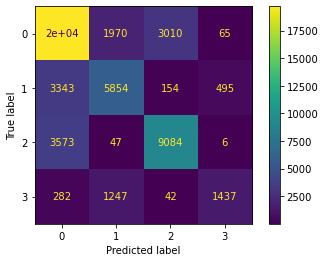

In [533]:
# Evaluation on the testing set 
RFC_test_score= calc_cost_class(X_test, y_test, RFC)

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  96.73075584805495
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     98942
           1       0.99      0.98      0.99     39210
           2       0.94      0.95      0.95     51393
           3       1.00      0.99      0.99     11633

    accuracy                           0.97    201178
   macro avg       0.97      0.97      0.97    201178
weighted avg       0.97      0.97      0.97    201178

Confusion Matrix: 



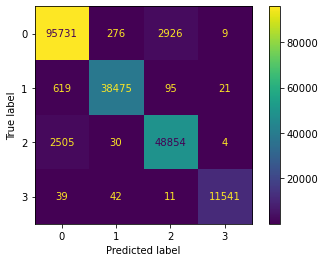

In [534]:
# Evaluation on the training set 
RFC_train_score = calc_cost_class(X_train, y_train, RFC, 'Training')

In [535]:
# The final model evaluation
cost_diff_class(RFC_train_score,RFC_test_score)

| Training Accuracy | Testing Accuracy |
|     96.73         |    71.7         |
The differance betewen the train accuracy and test accuracy is: 25.03%
So maybe there is an (Overfiting)


### **2nd Model  Evaluation (XG Boost Classifier)**

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  74.40898697683667
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.82      0.79     24731
           1       0.68      0.60      0.64      9846
           2       0.77      0.74      0.75     12710
           3       0.76      0.55      0.64      3008

    accuracy                           0.74     50295
   macro avg       0.74      0.68      0.71     50295
weighted avg       0.74      0.74      0.74     50295

Confusion Matrix: 



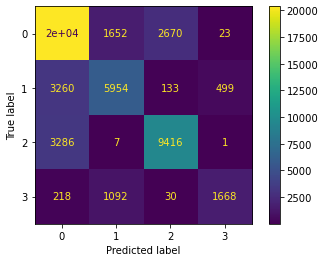

In [613]:
# Evaluation on the testing set 
XGB_C_test_score= calc_cost_class(X_test, y_test, XGB_C)

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  76.23845549712195
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.83      0.80     98942
           1       0.73      0.65      0.69     39210
           2       0.77      0.74      0.76     51393
           3       0.84      0.62      0.71     11633

    accuracy                           0.76    201178
   macro avg       0.78      0.71      0.74    201178
weighted avg       0.76      0.76      0.76    201178

Confusion Matrix: 



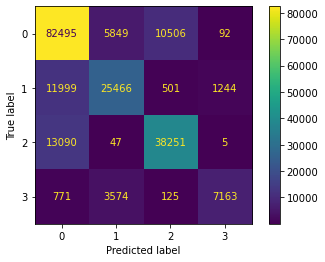

In [614]:
# Evaluation on the training set 
XGB_C_train_score = calc_cost_class(X_train, y_train, XGB_C, 'Training')

In [615]:
# The final model evaluation
cost_diff_class(XGB_C_train_score,XGB_C_test_score)

| Training Accuracy | Testing Accuracy |
|     76.24         |    74.41         |
The differance betewen the train accuracy and test accuracy is: 1.83%
The model is (Great)


## Invetgiate the model

In [540]:
XGB_C_imp = XGB_C.feature_importances_

In [541]:
px.bar(
    x = X_train.columns,
    y = XGB_C_imp
)

### **3rd Model  Evaluation (Logistic Regression)**

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  48.99294164429864
Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.98      0.66     24731
           1       0.27      0.02      0.03      9846
           2       0.29      0.02      0.04     12710
           3       0.00      0.00      0.00      3008

    accuracy                           0.49     50295
   macro avg       0.26      0.25      0.18     50295
weighted avg       0.37      0.49      0.34     50295

Confusion Matrix: 



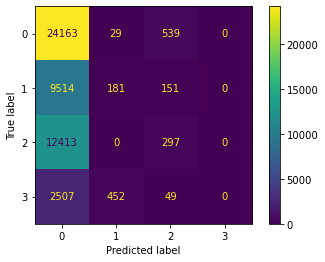

In [542]:
# Evaluation on the testing set 
LR_c_test_score= calc_cost_class(X_test, y_test, LR_c)

>>>>>>>>>>>>>>>>>>>>>>>Training Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<
Accuracy :  49.00088478859517
Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.98      0.66     98942
           1       0.26      0.02      0.03     39210
           2       0.29      0.02      0.04     51393
           3       0.00      0.00      0.00     11633

    accuracy                           0.49    201178
   macro avg       0.26      0.25      0.18    201178
weighted avg       0.37      0.49      0.34    201178

Confusion Matrix: 



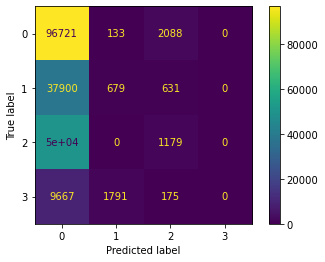

In [543]:
# Evaluation on the training set 
LR_c_train_score = calc_cost_class(X_train, y_train, LR_c, 'Training')

In [563]:
# The final model evaluation
cost_diff_class(LR_c_train_score,LR_c_test_score)

| Training Accuracy | Testing Accuracy |
|     49.0         |    48.99         |
The differance betewen the train accuracy and test accuracy is: 0.01%
The model is (Great)


## Model Optimization - Hyperparameter Tuning 

In [637]:
# Make copy from the original df to prefrome the hyperparametr tuning
cl_h_df = df.copy()

# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']

unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('TotalCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('PartOfDay')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
# unwanted_cols.append('CarClass')
# unwanted_cols.append('CarType')
# unwanted_cols.append('ManufactureYear')

# unwanted_cols.append('PartsNumber')
# unwanted_cols.append('PaymentType')

# unwanted_cols.append('PartStateList')

target = 'TotalCostEvaluation'

cl_h_df.drop(unwanted_cols, axis=1, inplace=True)



# Extract the categorical and numircal columns
cat_cols = cl_h_df.describe(exclude='number').columns
num_cols = cl_h_df.describe().columns

cl_h_df[cat_cols]=cl_h_df[cat_cols].apply(LabelEncoder().fit_transform)


# Split the data to train and test with 80% for the train set and 20% for test set and make the random state to 42  
X_train, X_test, y_train, y_test = train_test_split(cl_h_df.drop(target, axis=1), cl_h_df[target],  train_size=0.8, random_state=42)

In [638]:

# Now combine all last transfromers to one pipline.
cl = Pipeline(
    steps=[
        ('Model', XGBRegressor())
    ]
)

In [639]:
param_grid = [{
    # Speicfy the XG Boost Regressor model and it several parameters 
    "Model":[XGBClassifier()],
    "Model__n_estimators": [x for x in np.arange(150,301, 50)],
    "Model__max_depth":[x for x in np.arange(3,12, 1)],
    # "Model__subsample": [x for x in np.arange(0.75,1.01, 0.05)],
    "Model__eta":  [0.01,0.15,0.25,0.3],    #[x for x in np.arange(0.01,0.35, 0.02)],
    "Model__gamma": [1,2,4,6,8] #[x for x in np.arange(0,9, 1)],
    
},
{
    # Speicfy the XG Boost Regressor model and it several parameters 
    "Model":[XGBClassifier()],   
}]

grid_cl = GridSearchCV(cl, 
                    param_grid=param_grid, 
                    cv=5, 
                    verbose=1,  
                    n_jobs=-1, 
                    error_score='raise'
                   )

grid_cl.fit(X_train,y_train)

Fitting 5 folds for each of 721 candidates, totalling 3605 fits


KeyboardInterrupt: 

In [ ]:
# Get all the grid search result in dataframe
grid_cl_df = pd.DataFrame(grid_cl.cv_results_)

# To take just the name of the model without any additoinal parameters
grid_cl_df['param_Model'] = grid_cl_df['param_Model'].apply(lambda x : str(x).split('(')[0])

# Sort the dataframe on the rank test score
grid_cl_df= grid_cl_df.sort_values(by = ['rank_test_score'])

# Get Five top result
grid_cl_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__eta,param_Model__gamma,param_Model__max_depth,param_Model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
204,32.737361,0.593453,0.043610,0.010133,XGBRegressor,0.15,1,9,150,"{'Model': XGBRegressor(base_score=None, booste...",0.276313,0.276150,0.289174,0.285684,0.284130,0.282290,0.005210,1
207,61.039126,1.614892,0.044610,0.007737,XGBRegressor,0.15,1,9,300,"{'Model': XGBRegressor(base_score=None, booste...",0.276313,0.276150,0.289174,0.285684,0.284130,0.282290,0.005210,2
206,51.476975,1.251770,0.046011,0.008879,XGBRegressor,0.15,1,9,250,"{'Model': XGBRegressor(base_score=None, booste...",0.276313,0.276150,0.289174,0.285684,0.284130,0.282290,0.005210,3
205,42.078862,0.912306,0.047211,0.006883,XGBRegressor,0.15,1,9,200,"{'Model': XGBRegressor(base_score=None, booste...",0.276313,0.276150,0.289174,0.285684,0.284130,0.282290,0.005210,4
203,52.041302,1.791341,0.041410,0.007555,XGBRegressor,0.15,1,8,300,"{'Model': XGBRegressor(base_score=None, booste...",0.276239,0.274027,0.289021,0.287573,0.284258,0.282223,0.006032,5


### The best result from the grid search

In [557]:
grid_cl.best_params_

{'Model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eta=0.15, gamma=1, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None),
 'Model__eta': 0.15,
 'Model__gamma': 1,
 'Model__max_depth': 9,
 'Model__n_estimators': 150}

In [561]:
# Evaluation on the testing set 
grid_cl_test_score= calc_cost_class(X_test, y_test, grid_cl)

>>>>>>>>>>>>>>>>>>>>>>>Testing Set Report<<<<<<<<<<<<<<<<<<<<<<<<<<


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

***

## Save Models

In [616]:
joblib.dump(XGB_R, f"models/XGBR_Model_19_23-21")
joblib.dump(XGB_C, f"models/XGBC_Model_19_23-21")

['models/XGBC_Model_19_23-21']

In [42]:
joblib.dump(RFR, f"models/RFR_Model_7AM")
# joblib.dump(svr, f"models/SVR_Model_7AM")
joblib.dump(XGB_R, f"models/XGBR_Model_7AM")
# joblib.dump(Oencoder, f"models/ordinal_endcoder_7AM")
# joblib.dump(scaler, f"models/scaler_7AM")

['models/scaler_7AM']

***

# Tests on Actual value

In [92]:
df.iloc[146990].to_dict()

{'c_id': 147064,
 'City': 'Riyadh',
 'RegistrationTime': '2018-07-17 18:15:24.793000',
 'CloseTime': '2018-07-17 18:30:00',
 'CarBrand': 'Toyota',
 'CarModel': 'FG',
 'ManufactureYear': 2010,
 'CarColor': 'white',
 'AssessmentCost': 3057,
 'SparePartCost': 557,
 'TotalCost': 3614,
 'PaymentType': 'POS',
 'DurationTime': 14,
 'Hour': 18,
 'Month': 7,
 'Day': 17,
 'WeekDay': 'Tuesday',
 'PartsList': ['Bumper', 'Decoration'],
 'PositionList': ['rear right'],
 'PartStateList': ['New'],
 'CarMade': 'Japan',
 'CarClass': 'Normal',
 'CarType': 'Multi',
 'SparePart_Differace%': 448.8330341113106,
 'AssessmentEvaluation': 'Very High',
 'PartsNumber': 2,
 'TimeEvaluation': 'Acceptable',
 'PartOfDay': 'Evening',
 'RushHour': 'No'}

In [89]:
test_df = pd.DataFrame({
 'Area': {0: 0.0},
 'CarBrand': {0: 46.0},
 'CarModel': {0: 540.0},
 'ManufactureYear': {0: 0.6929804224731195},
 'CarColor': {0: 16.0},
 'PaymentType': {0: 0.0},
 'CarMade': {0: 9.0},
 'CarClass': {0: 1.0},
 'CarType': {0: 1.0},
 'part_Bridge': {0: 0},
 'part_Bumper': {0: 1},
 'part_Coilover': {0: 0},
 'part_Control Arms': {0: 0},
 'part_Dash insulator': {0: 0},
 'part_Decoration': {0: 0},
 'part_Door': {0: 0},
 'part_Fender': {0: 1},
 'part_Fiber': {0: 0},
 'part_Grill': {0: 0},
 'part_Handle': {0: 0},
 'part_Headlight': {0: 0},
 'part_Hinges': {0: 0},
 'part_Hood': {0: 0},
 'part_Injection': {0: 0},
 'part_Mirror': {0: 0},
 'part_Mudguard': {0: 0},
 'part_Muffler': {0: 0},
 'part_Other': {0: 0},
 'part_Power Window': {0: 0},
 'part_Radiator': {0: 0},
 'part_Rims': {0: 0},
 'part_Rotor': {0: 0},
 'part_Sensor': {0: 0},
 'part_Shock absorber': {0: 0},
 'part_Splash shield': {0: 0},
 'part_Stabilizer link': {0: 0},
 'part_Taillight': {0: 0},
 'part_Tie rod': {0: 0},
 'part_Tire': {0: 0},
 'part_Windshild ': {0: 0},
 'pos_front': {0: 0},
 'pos_left': {0: 0},
 'pos_rear': {0: 1},
 'pos_rear left': {0: 1},
 'pos_rear right': {0: 0},
 'pos_right': {0: 0},
 'pos_undefined': {0: 0},
 'state_New': {0: 1},
 'state_Used': {0: 0}
})

In [90]:
test_df

,Area,CarBrand,CarModel,ManufactureYear,CarColor,PaymentType,CarMade,CarClass,CarType,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,0.0,46.0,540.0,0.69298,16.0,0.0,9.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [91]:
out = XGB_R.predict(test_df)
test_df['TotalCost'] = out
# scaler.inverse_transform(test_df)

ValueError: Feature shape mismatch, expected: 55, got 49

In [178]:
print(out)
test_df

[5144.9707]


,Area,CarBrand,CarModel,ManufactureYear,CarColor,PaymentType,CarMade,CarClass,CarType,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used,TotalCost
0,0.0,46.0,540.0,0.69298,16.0,0.0,9.0,1.0,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,5144.970703


***
# Additional Model (Deep Learning)
#### Here we try to use Artifictial Neuaral Network with our built function to hyperparameter tuning with classification problem
***

### Imports

In [452]:
import time 

import tensorflow as tf
from keras.layers import Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# HyperTuning functions and testing

### Override the callback function 

In [468]:
#This code is an override on the Callback function of Keras and trying to build our own condition to interrupt the training 
# if the error for the second epoch is higher than the previous epoch by 2%
class cut_theTraining(tf.keras.callbacks.Callback):
    def __init__(self, base_on):
        super(cut_theTraining, self).__init__()
        #Define my varibales "base_on" it is any loss that you want to cut from, whether it is a training or validation loss
        #'Previous' varibale will save the previous epoch loss 
        self.base_on = base_on
        self.previous=0

    def on_epoch_end(self, epoch, logs=None): 
        # Init poitn if it's first epoch and there is not previous loss
        if epoch==0:
            self.previous= logs[self.base_on]
            
        # define the loss threshold 
        error_tolerance= self.previous+(self.previous*0.05)

        #If the current loss was higher than the threshold, I would cut off the training
        if logs[self.base_on] >= error_tolerance:
            self.model.stop_training = True

        #Make the current loss the previous one in preparation for the next iteration
        if epoch>0:
            self.previous= logs[self.base_on]

### Check user input function

In [454]:
#Define a function to check user input
def check_user_input(layers_nums, units_nums, activations, optimizers, epochs, batch_size):

    #The number of layers must be entered as a list, and the number of layers must be greater than 3, otherwise an error will appear.
    if type(layers_nums) is list:
        for x in layers_nums:
            if x<3:
                raise Exception("Layers Number Must Be More than 2!")
    else:
        raise Exception("Layers number Must Be in list!")

    # The number of units must be entered as a list, and the number of units must be greater than 0, otherwise an error will appear.
    if type(units_nums) is list:
        for x in units_nums:
            if x<1:
                raise Exception("Layers Number Must Be More than 0!")
    else:
        raise Exception("Units number Must Be in list!")  
          
    #The activations must be entered as a list, and the entered activations must be from the list below the condition
    #(taken from the official website), otherwise an error will appear.
    if type(activations) is list:
        activationsList=['relu','sigmoid','softmax','softplus', 'softsign', 'tanh', 'selu','elu', 'exponential']
        for x in activations:
            if x not in activationsList:
                raise Exception(f"({x}) Not In Activations List")
    else:
        raise Exception("Activations Must Be in list!")

    #The optimizers must be entered as a list, and the entered optimisers must be from the list below the condition 
    # (taken from the official website), otherwise an error will appear.
    if type(optimizers) is list:
        optimizersList=['sgd','rmsprop','adam','adadelta','adagrad','adamax','nadam','ftrl']
        for x in optimizers:
            if str(x).lower() not in optimizersList:
                raise Exception(f"({x}) Not In Optimizers List")
    else:
        raise Exception("Activations Must Be in list!")

    #The epochs must be between 30 and 100, otherwise an error will appear.
    if epochs<30 and epochs>100:
        raise Exception("Epoch Number Must Be Between 30-100 !!")

    #The batch size must be more than or equal 1, otherwise an error will appear.
    if batch_size<1:
        raise Exception("Batch Size Must Be Greater than 0!!")


        

### Build Model Function

In [466]:
#Define the function and set the default values, which enables the user to call the function without setting all the parameters
def build_model(
    X_train, y_train, X_test, y_test, base_on=None,
    layers_nums=[3], units_nums=[6], activations=['relu'], optimizers=['adam'], epochs=100, batch_size=32):

    #Verify user input
    check_user_input(layers_nums, units_nums, activations, optimizers, epochs, batch_size)

    if base_on:
        base_on=cut_theTraining(base_on=base_on)

    # Display the fits number by multiplying the lengths of inputs
    fitting_number= len(layers_nums)*len(units_nums)*len(activations)*len(optimizers)
    print(f'Number of fitting:{fitting_number}')

    #Timer Start point
    start_t=time.time()

    # Initializing the result variable to put all the trained models in it
    resutls={}
    counter=0

    #Initializing a global variable for a model
    model = tf.keras.models.Sequential()

    #This part is where the model is trained on all inputs by traditional loop (for)
    for activation in activations:
        for optimizer in optimizers:
            for layer in layers_nums: 
                for unit in units_nums:
                    #Take the current layer number and then create layers on the model variable 
                    '''
                    For example, the current layer 3, this iteration will be from 0 to 2, as the first iteration will create a new model and a new layer, 
                    and the second iteration will be the creation of only one layer, and the third iteration will put the output layer and put the 
                    result of the model in the results variable
                    '''
                    for l in range(layer):

                        #If it is the first iteration, create new model
                        if l==0:
                            print('#'*50)
                            print(f'Initialize Model:{counter}')
                            model = tf.keras.models.Sequential()
                            
                        #If this is the last iteration, add an output layer to the mod, train the mod, and save its result in the results variable
                        if (l+1) == layer:
                            model.add(Dense(units=4, activation='softmax'))
                            model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
                            model_history= model.fit(X_train, y_train.values, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test), callbacks=base_on)

                            resutls['Model_'+str(counter)]={
                                'units':unit,
                                'layers':layer,
                                'activation':activation,
                                'optimizer':optimizer,
                                'epochs':epochs,
                                'batch_size':batch_size,
                                'model_history':model_history
                            }

                            print('='*50)
                            print(f'End Model:{counter}')
                            counter+=1
                
                        #Add a normal layer if it's a hidden layer in the middle loop
                        model.add(Dense(units=unit, activation=activation))

     #Timer End point
    end_t=time.time()
    
    print('='*50)
    print(f'Excection Time:\n{round(end_t-start_t,2)}')
    print(f'Number of fitting:\n{fitting_number}')
    print('='*50)

    return resutls



### Get Best Model Function

In [457]:
#Defining a function that returns the best model among the list of models in the result dictionary
def best_model(resutls, on_val=False):

    #The default variable for calculating the best accuracy
    best_on='accuracy'
    # If the user wants to calculate the best model for the accuracy of validation set, he/she makes this variable true
    if on_val:
        best_on='val_accuracy'

    best_model = ''
    max_accuarcy = 0
    for k, v in resutls.items():
        for k2,v2 in v.items():
            if k2=='model_history':
                if max_accuarcy < max(v2.history[best_on]):
                    max_accuarcy= max(v2.history[best_on])
                    best_model = k

    return resutls[best_model]

### Get Accuracy of Model Function

In [458]:
def get_accuracy(model, on_val=False, is_cutted=False):

    element=-1
    on='accuracy'

    # If the user wants to calculate the best accuarcy of validation set, he/she makes this variable true
    if on_val:
        on='val_accuracy'
    if is_cutted:
        element=-2
    return model['model_history'].history[on][element]

In [459]:
def create_plot(accuracy, loss, val_accuracy=None, val_loss=None):
    fig1 = go.Scatter(
    y=accuracy,
    name="Train_Accuracy"
    )


    fig3 = go.Scatter(
        y=loss,
        name="Train_Loss"
    )


    fig = make_subplots(rows=1, cols=2,
    subplot_titles=("Accuracy in Each Epoch", "Loss in Each Epoch")
    )
    fig.add_trace(fig1, row=1, col=1)
    fig.add_trace(fig3, row=1, col=2)

    if val_accuracy and val_loss:
        fig2 = go.Scatter(
            y=val_accuracy,
            name="Val_Accuracy")
        fig4 = go.Scatter(
            y=val_loss,
            name="Val_Loss")
            
        fig.add_trace(fig2, row=1, col=1)
        fig.add_trace(fig4, row=1, col=2)

    fig.update_layout(xaxis=dict(tickangle=90), title_text="Model Histroy linechart")
    fig.show()

### Feature Engineering and Feature Selection

In [461]:
deep_df = df.copy()
# Get dummies for parts regression dataframe 
deep_df = deep_df.join(deep_df['PartsList'].str.join('|').str.get_dummies().add_prefix('part_'))
deep_df = deep_df.join(deep_df['PositionList'].str.join('|').str.get_dummies().add_prefix('pos_'))
deep_df = deep_df.join(deep_df['PartStateList'].str.join('|').str.get_dummies().add_prefix('state_'))


deep_df.head(1)
# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']

unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('TotalCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('PartOfDay')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
# unwanted_cols.append('CarClass')
# unwanted_cols.append('CarType')
# unwanted_cols.append('ManufactureYear')

# unwanted_cols.append('PartsNumber')
# unwanted_cols.append('PaymentType')

# unwanted_cols.append('PartStateList')

target = 'TotalCostEvaluation'

deep_df.drop(unwanted_cols, axis=1, inplace=True)

cat_cols = deep_df.describe(exclude='number').columns
num_cols = deep_df.describe().columns


deep_df[cat_cols]=deep_df[cat_cols].apply(LabelEncoder().fit_transform)
deep_df

,Area,CarBrand,CarModel,ManufactureYear,PaymentType,CarMade,CarClass,CarType,PartsNumber,TotalCostEvaluation,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,4,96,815,2002,1,13,0,1,4,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,4,96,815,2008,1,13,0,1,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,2,5,655,2012,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,37,362,2011,1,9,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,50,412,2007,0,8,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251468,1,40,740,2016,0,8,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
251469,0,37,278,2016,0,9,1,1,5,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0
251470,3,12,505,2011,0,16,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
251471,1,37,278,2016,1,9,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Split Data

In [462]:


X_train, X_test, y_train, y_test = train_test_split(deep_df.drop(target, axis=1), deep_df[target],  train_size=0.8, random_state=42)

### Build The Model and test it

In [469]:
results = build_model(
    X_train,y_train,
    X_test,y_test,

    base_on='val_loss',

    layers_nums=[3,4,5],
    units_nums=[6,7,8,9],
    activations=['relu','softmax'],
    optimizers=['adam'],
    epochs=100,
    batch_size=32)

Number of fitting:24
##################################################
Initialize Model:0
Epoch 1/100
6287/6287 [==============================] - 6s 913us/step - loss: 1.5984 - accuracy: 0.4883 - val_loss: 1.1845 - val_accuracy: 0.4917
Epoch 2/100
6287/6287 [==============================] - 5s 856us/step - loss: 1.1813 - accuracy: 0.4918 - val_loss: 1.1846 - val_accuracy: 0.4917
Epoch 3/100
6287/6287 [==============================] - 5s 831us/step - loss: 1.1812 - accuracy: 0.4918 - val_loss: 1.1845 - val_accuracy: 0.4917
Epoch 4/100
6287/6287 [==============================] - 5s 836us/step - loss: 1.1813 - accuracy: 0.4918 - val_loss: 1.1844 - val_accuracy: 0.4917
Epoch 5/100
6287/6287 [==============================] - 5s 815us/step - loss: 1.1813 - accuracy: 0.4918 - val_loss: 1.1844 - val_accuracy: 0.4917
Epoch 6/100
6287/6287 [==============================] - 5s 823us/step - loss: 1.1813 - accuracy: 0.4918 - val_loss: 1.1845 - val_accuracy: 0.4917
Epoch 7/100
6287/6287 [====

#### Extract the best model

In [479]:
best_model = best_model(results)

#### Model Parameter

In [480]:
best_model

{'units': 9,
 'layers': 5,
 'activation': 'relu',
 'optimizer': 'adam',
 'epochs': 100,
 'batch_size': 32,
 'model_history': <keras.callbacks.History at 0x1bd682cefa0>}

#### Get the accuracy

In [481]:
get_accuracy(best_model)

0.6660420298576355

### Plot the Result

*** 
# Tests
***

In [640]:
# Take copy from original dataframe to apply the regression model
reg_df = df.copy()

# Get dummies for parts regression dataframe 
reg_df = reg_df.join(reg_df['PartsList'].str.join('|').str.get_dummies().add_prefix('part_'))
reg_df = reg_df.join(reg_df['PositionList'].str.join('|').str.get_dummies().add_prefix('pos_'))
reg_df = reg_df.join(reg_df['PartStateList'].str.join('|').str.get_dummies().add_prefix('state_'))


# Remove unwanted columns from Regression Training
unwanted_cols = ['c_id','RegistrationTime', 'CloseTime', 'Hour','Month', 'Day', 'WeekDay', 'PartsList', 'PositionList', 'PartStateList']
unwanted_cols.append('AssessmentCost')
unwanted_cols.append('SparePartCost')
unwanted_cols.append('SparePart_Differace%')
unwanted_cols.append('AssessmentEvaluation')
unwanted_cols.append('TotalCostEvaluation')

unwanted_cols.append('TimeEvaluation')
unwanted_cols.append('DurationTime')

unwanted_cols.append('CarColor')
unwanted_cols.append('CarClass')
# Than drop the columns
reg_df.drop(unwanted_cols, axis=1, inplace=True)

target = 'TotalCost'

cat_cols = reg_df.describe(exclude='number').columns
num_cols = reg_df.describe().columns



reg_df[cat_cols]=reg_df[cat_cols].apply(LabelEncoder().fit_transform)
reg_df


,Area,CarBrand,CarModel,ManufactureYear,TotalCost,PaymentType,CarMade,CarType,PartsNumber,PartOfDay,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,4,96,815,2002,3710,1,13,1,4,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,4,96,815,2008,11820,1,13,1,4,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,2,5,655,2012,10556,0,5,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,37,362,2011,1386,1,9,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,1,50,412,2007,2019,0,8,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251468,1,40,740,2016,3580,0,8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
251469,0,37,278,2016,12011,0,9,1,5,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0
251470,3,12,505,2011,3200,0,16,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
251471,1,37,278,2016,1947,1,9,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [641]:
import json

uniqueKyes = {}
for x in cat_cols:
    uniqueKyes[x] = dict(zip(df[x].unique(),(reg_df[x].unique())))

for k,v in uniqueKyes.items():
    for k2,v2 in v.items():
        uniqueKyes[k][k2] = int(v2)

uniqueKyes

with open('UniqueKyes', 'w') as f:
    f.write(json.dumps(uniqueKyes))


In [642]:
input_dict = {'Area': 2,
 'CarBrand': 92,
 'CarModel': 201,
 'ManufactureYear': 2016,
 'PaymentType': 0,
 'CarMade': 8,
 'CarType': 1,
 'PartsNumber': 3,
 'PartOfDay': 0,
 'part_Bridge': 1,
 'part_Bumper': 1,
 'part_Coilover': 0,
 'part_Control Arms': 0,
 'part_Dash insulator': 0,
 'part_Decoration': 0,
 'part_Door': 0,
 'part_Fender': 0,
 'part_Fiber': 0,
 'part_Grill': 0,
 'part_Handle': 0,
 'part_Headlight': 0,
 'part_Hinges': 0,
 'part_Hood': 0,
 'part_Injection': 0,
 'part_Mirror': 0,
 'part_Mudguard': 0,
 'part_Muffler': 0,
 'part_Other': 0,
 'part_Power Window': 0,
 'part_Radiator': 0,
 'part_Rims': 0,
 'part_Rotor': 0,
 'part_Sensor': 1,
 'part_Shock absorber': 0,
 'part_Splash shield': 0,
 'part_Stabilizer link': 0,
 'part_Taillight': 0,
 'part_Tie rod': 0,
 'part_Tire': 0,
 'part_Windshild ': 0,
 'pos_front': 0,
 'pos_front left': 0,
 'pos_front right': 0,
 'pos_left': 0,
 'pos_rear': 1,
 'pos_rear left': 1,
 'pos_rear right': 0,
 'pos_right': 0,
 'pos_undefined': 0,
 'state_New': 1,
 'state_Used': 0}

test_df = pd.DataFrame(input_dict, index=[0])
test_df

,Area,CarBrand,CarModel,ManufactureYear,PaymentType,CarMade,CarType,PartsNumber,PartOfDay,part_Bridge,part_Bumper,part_Coilover,part_Control Arms,part_Dash insulator,part_Decoration,part_Door,part_Fender,part_Fiber,part_Grill,part_Handle,part_Headlight,part_Hinges,part_Hood,part_Injection,part_Mirror,part_Mudguard,part_Muffler,part_Other,part_Power Window,part_Radiator,part_Rims,part_Rotor,part_Sensor,part_Shock absorber,part_Splash shield,part_Stabilizer link,part_Taillight,part_Tie rod,part_Tire,part_Windshild,pos_front,pos_front left,pos_front right,pos_left,pos_rear,pos_rear left,pos_rear right,pos_right,pos_undefined,state_New,state_Used
0,2,92,201,2016,0,8,1,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [643]:
XGB_R = joblib.load(f"models/XGBR_Model_19_23-21")
XGB_C = joblib.load(f"models/XGBC_Model_19_23-21")

In [644]:
XGB_R.predict(test_df)

array([4544.4595], dtype=float32)

In [ ]:
y_train.iloc[0]

3318

In [648]:
df[df['PartsNumber']==1]

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
2,94,Orouba,2018-01-01 10:17:57.727000,2018-01-01 10:25:00,BMW,Sedan,2012,white,5778,4778,10556,Insurance Company,7,10,1,1,Monday,[Bumper],[rear],[New],Germany,Luxury,Car,20.929259,Acceptable,1,Fast,Morning,Acceptable
3,99,Orouba,2018-01-01 10:25:36.453000,2018-01-01 10:52:00,Hyundai,Genesis,2011,silver,1043,343,1386,POS,26,10,1,1,Monday,[Sensor],[undefined],[New],Korea,Luxury,Multi,204.081633,unacceptable,1,Delay,Morning,Low
7,120,Orouba,2018-01-01 08:58:11.430000,2018-01-01 09:05:00,Lexus,GS 460,2011,white,2019,1019,3038,Insurance Company,6,8,1,1,Monday,[Bumper],[rear],[New],Japan,Luxury,Car,98.135427,unacceptable,1,Fast,Morning,Low
12,295,Capital Industrial,2018-01-01 09:44:24.113000,2018-01-01 09:52:00,Mercedes,320,2003,silver,2300,800,3100,Insurance Company,7,9,1,1,Monday,[Bumper],[front],[Used],Germany,Luxury,Multi,187.500000,unacceptable,1,Fast,Morning,Low
15,408,New Industrial,2018-01-01 11:03:56.103000,2018-01-01 11:20:00,Lexus,IS 350,2016,grey,3500,1500,5000,Insurance Company,16,11,1,1,Monday,[Dash insulator],[rear right],[New],Japan,Luxury,Car,133.333333,unacceptable,1,Acceptable,Morning,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251461,253382,Remmal Industrial,2018-12-19 10:51:52.593000,2018-12-19 11:21:00,Toyota,Prado,2014,white,1620,820,2441,Insurance Company,29,10,12,19,Wednesday,[Bumper],"[rear, rear right]",[New],Japan,Normal,Multi,97.560976,unacceptable,1,Delay,Morning,Low
251464,253386,Remmal Industrial,2018-12-19 13:12:38.333000,2018-12-19 13:35:00,Kia,Cerato,2014,black,1372,572,1945,Insurance Company,22,13,12,19,Wednesday,[Mirror],[right],[New],Korea,Normal,Multi,139.860140,unacceptable,1,Acceptable,Afternoon,Low
251467,253389,Orouba,2018-12-19 12:51:14.513000,2018-12-19 13:02:00,Kia,Carnival,2015,silver,1702,902,2605,Insurance Company,10,12,12,19,Wednesday,[Bumper],[front],[New],Korea,Normal,Multi,88.691796,Very High,1,Fast,Afternoon,Low
251470,253392,Remmal Industrial,2018-12-19 17:22:22.537000,2018-12-19 17:36:00,Chevrolet,Malibu,2011,silver,2600,600,3200,Insurance Company,13,17,12,19,Wednesday,[Dash insulator],"[front left, rear left]",[New],US,Normal,Multi,333.333333,unacceptable,1,Acceptable,Evening,Acceptable


In [650]:
df[df['c_id']==253382]

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
251461,253382,Remmal Industrial,2018-12-19 10:51:52.593000,2018-12-19 11:21:00,Toyota,Prado,2014,white,1620,820,2441,Insurance Company,29,10,12,19,Wednesday,[Bumper],"[rear, rear right]",[New],Japan,Normal,Multi,97.560976,unacceptable,1,Delay,Morning,Low


In [649]:
df[df['c_id']==408]

,c_id,Area,RegistrationTime,CloseTime,CarBrand,CarModel,ManufactureYear,CarColor,AssessmentCost,SparePartCost,TotalCost,PaymentType,DurationTime,Hour,Month,Day,WeekDay,PartsList,PositionList,PartStateList,CarMade,CarClass,CarType,SparePart_Differace%,AssessmentEvaluation,PartsNumber,TimeEvaluation,PartOfDay,TotalCostEvaluation
15,408,New Industrial,2018-01-01 11:03:56.103000,2018-01-01 11:20:00,Lexus,IS 350,2016,grey,3500,1500,5000,Insurance Company,16,11,1,1,Monday,[Dash insulator],[rear right],[New],Japan,Luxury,Car,133.333333,unacceptable,1,Acceptable,Morning,Low
